In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from pathlib import Path
import os
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')
import re
from textblob import TextBlob
import spacy

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Graduate\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Graduate\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [4]:
nlp = spacy.load("en_core_web_sm")


In [5]:
print(Path.cwd())
os.chdir('../data/cleaned data')

c:\Users\Graduate\Desktop\Dreams\data visualization


In [6]:
df = pd.read_csv("complete.csv", index_col= 0)

In [9]:
tag_dict = {"word" :[], "tag":[]}
full = []

for i in df['complete']:
    sent = nlp(i)
    for j in sent:
        tag_dict['word'].append(j.text)
        tag_dict['tag'].append(j.tag_)

# #tag list can be found in : https://www.guru99.com/pos-tagging-chunking-nltk.html

In [11]:
tag_df  = pd.DataFrame(tag_dict)

In [12]:
tag_desc = pd.read_csv("../nltk_tag_description.csv", index_col= None).to_dict("list")

In [13]:
def barplot(x, z="", l = False):
    t = np.unique(x, return_counts = True)
    s = np.argsort(t[1])

    if l == True:
        x = t[0][s][-z:]
        y = t[1][s][-z:]
    else:   
        x = t[0][s]
        y = t[1][s]

    fig = plt.figure(figsize=(8,8)) #INITIALIZE FIGURE 
    ax = fig.add_subplot()

    ax.bar(x,y)

    ax.set_title(f"Barplot", fontsize = 20)
    ax.set_xlabel(f"", fontsize = 15)
    ax.set_ylabel("Count", fontsize = 15)
    plt.xticks(rotation=90)

    ax.legend()

    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


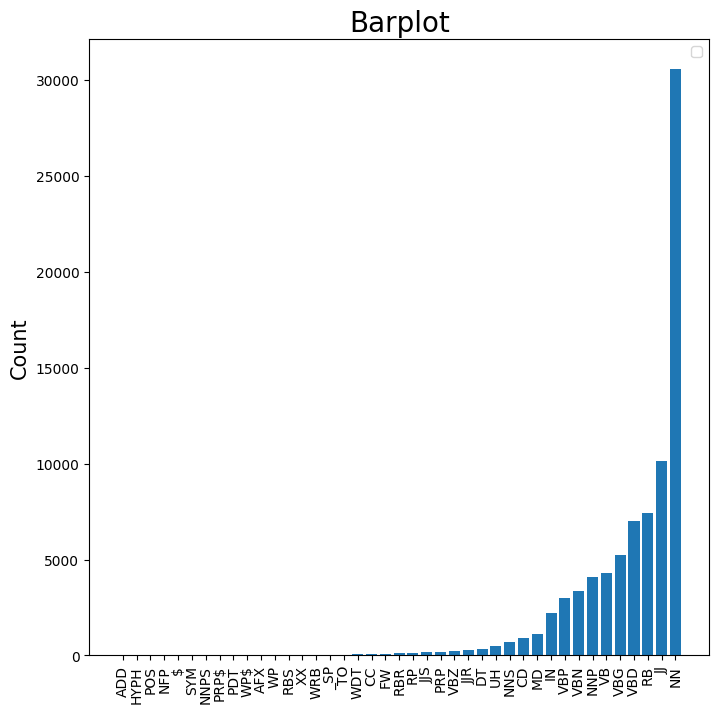

In [14]:
barplot(tag_df['tag'])

In [15]:
def wordcloud(x, lim):
    text = " ".join(x)
    cloud = WordCloud(collocations = False, max_words = lim).generate(text)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [19]:
tag_desc['$'] = ['Quant']

In [17]:
np.unique(tag_df['tag'])

array(['$', 'ADD', 'AFX', 'CC', 'CD', 'DT', 'FW', 'HYPH', 'IN', 'JJ',
       'JJR', 'JJS', 'MD', 'NFP', 'NN', 'NNP', 'NNPS', 'NNS', 'PDT',
       'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TO', 'UH',
       'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB',
       'XX', '_SP'], dtype=object)

$


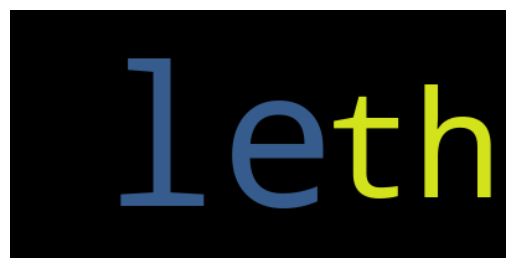

ADD


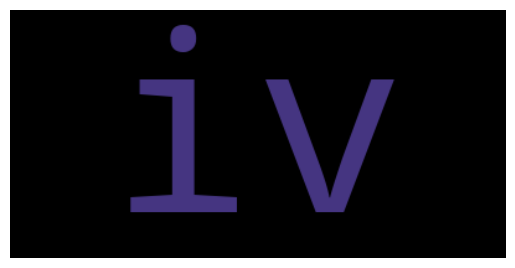

AFX


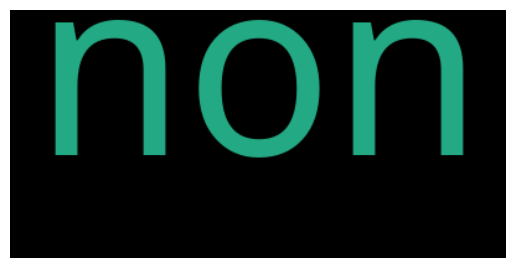

CC


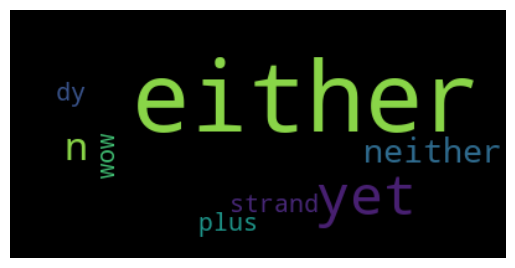

CD


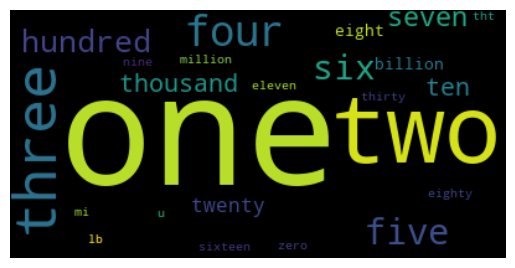

DT


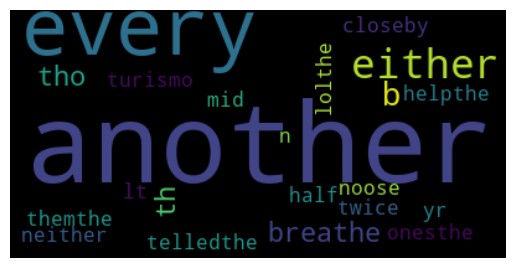

FW


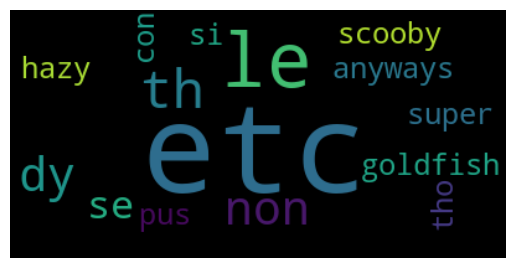

HYPH


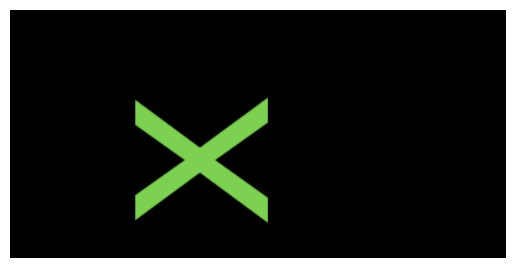

IN


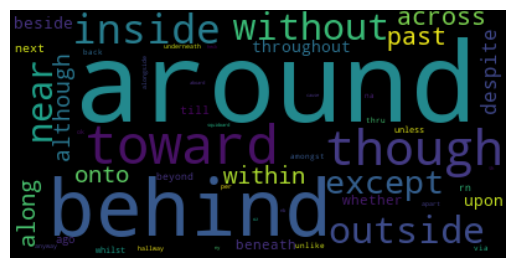

JJ


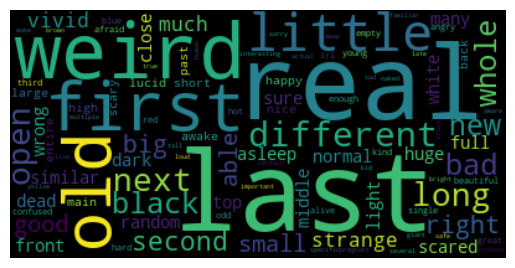

JJR


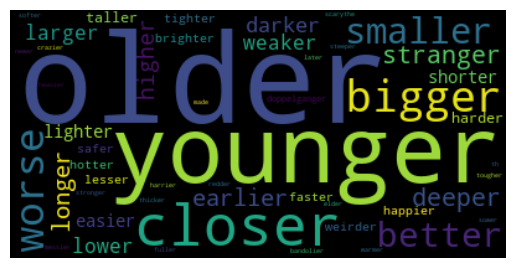

JJS


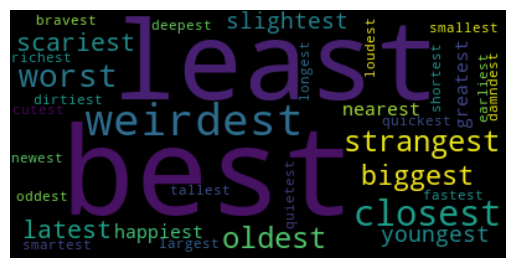

MD


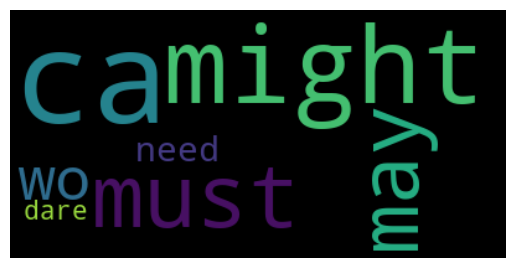

NFP


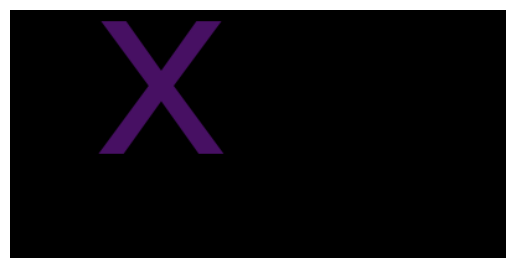

NN


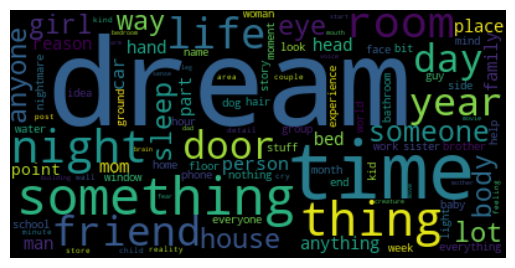

NNP


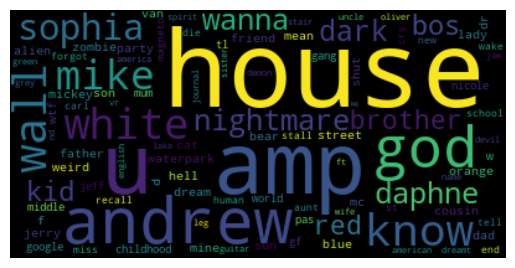

NNPS


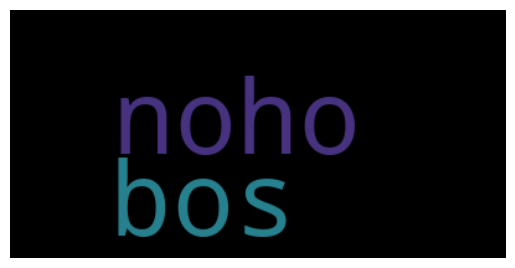

NNS


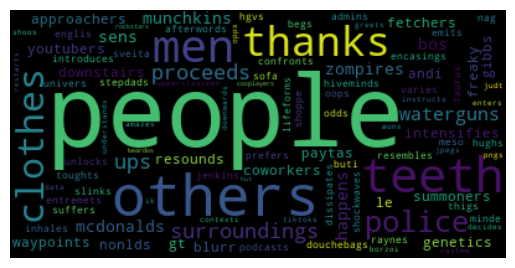

PDT


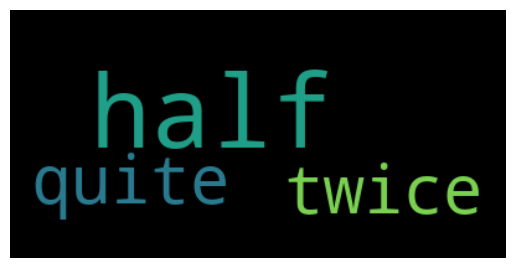

POS


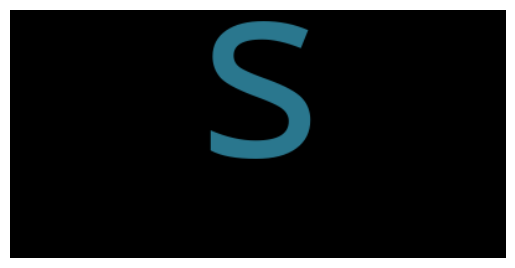

PRP


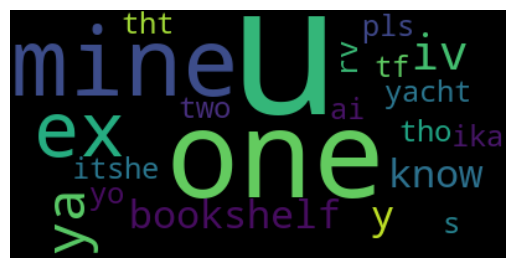

PRP$


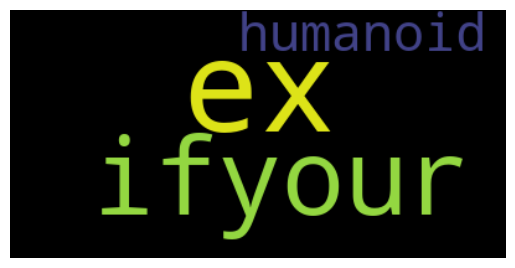

RB


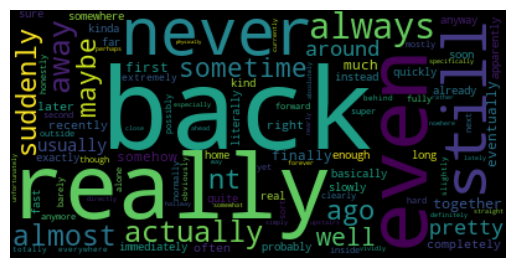

RBR


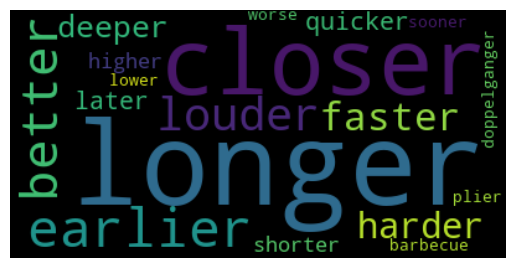

RBS


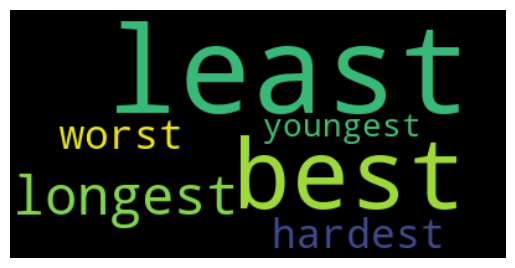

RP


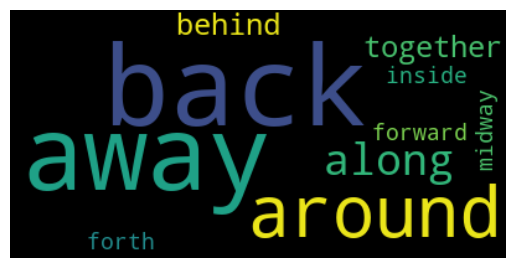

SYM


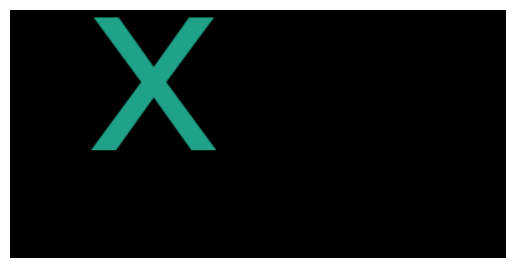

TO


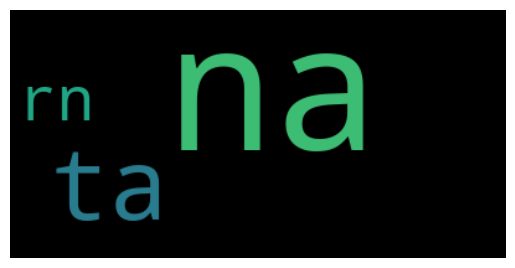

UH


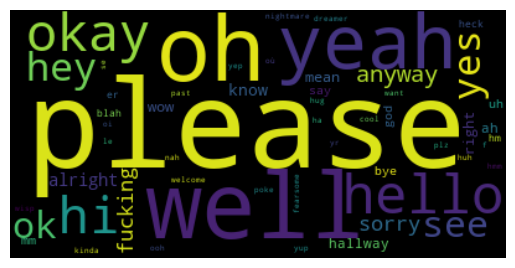

VB


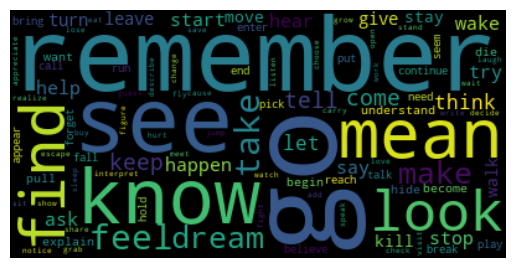

VBD


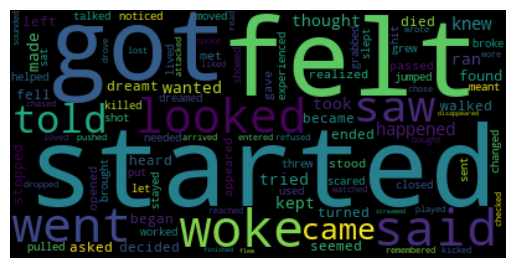

VBG


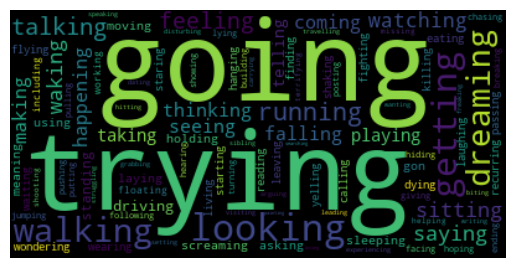

VBN


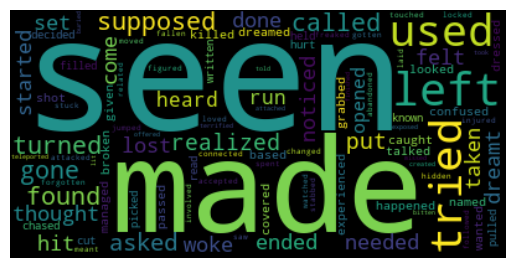

VBP


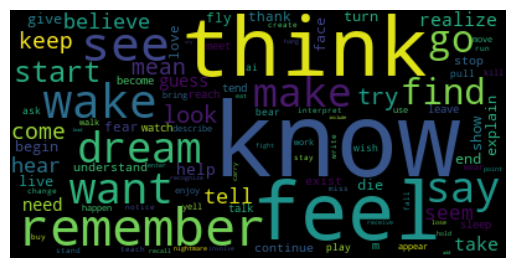

VBZ


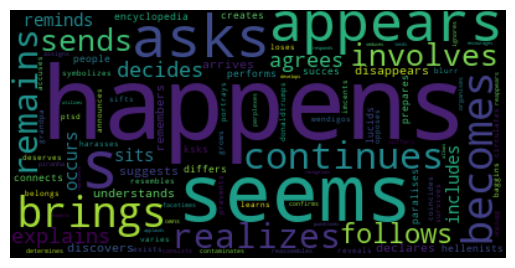

WDT


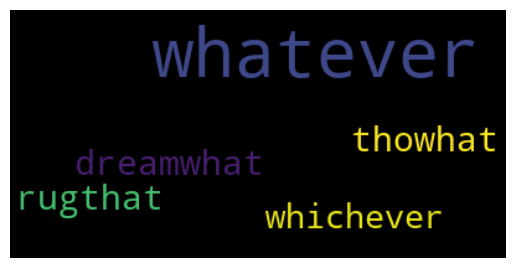

WP


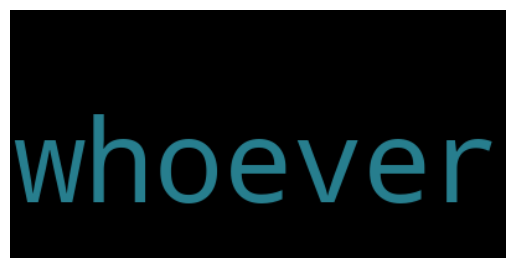

WP$


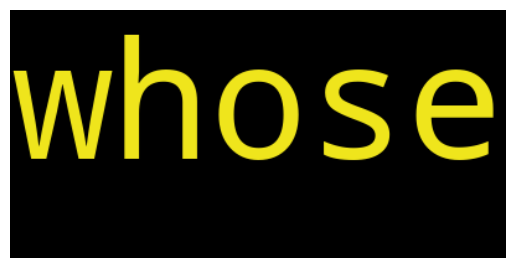

WRB


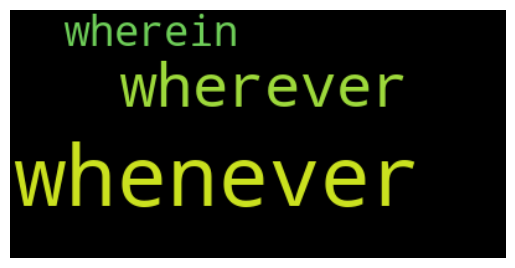

XX


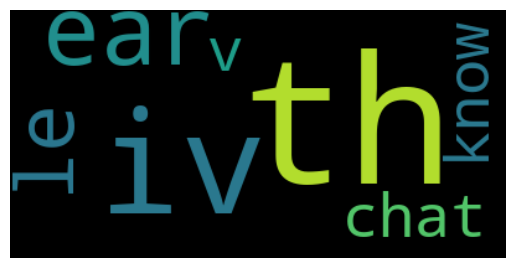

_SP
Word Cloud ValueError 



In [23]:
for i in np.unique(tag_df['tag']):
    temp = list(tag_df.loc[tag_df['tag'] == i , 'word'])
    print(i)
    #print(i, tag_desc[i])
    try:
        wordcloud(temp, lim = 100)
    except ValueError:
        print("Word Cloud ValueError \n")
        pass